In [25]:
import numpy as np
import pandas as pd
import glob
import os

df=pd.read_csv("./12 month data/Sales_April_2019.csv")


###  here combine all csv file for getting one file for analyze

In [2]:
files=[file for file in os.listdir("./12 month data")]
all_files=pd.DataFrame()
for file in files:
    df=pd.read_csv("./12 month data/"+file)
    all_files=pd.concat([all_files,df])
all_files

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### drop nan or null

In [3]:
all_files=all_files.dropna(how="all")


### create Month column

In [4]:
all_files["Month"]=all_files["Order Date"].str[0:2]
all_files

C:\Users\Sysadmin\AppData\Local\Temp/ipykernel_18004/180807489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_files["Month"]=all_files["Order Date"].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [5]:
all_files=all_files[all_files["Order Date"]!="Order Date"]
all_files

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


### Convert Quanity ,Each Price and Month into Floate or int

In [6]:
 
all_files=all_files.astype({"Price Each":"float","Quantity Ordered":"int","Month":"int"})    


### create Total sales column 

In [7]:
all_files["Total sale"]=all_files['Quantity Ordered']*all_files['Price Each']

### covert Quantity Ordered column into datetime datatype

In [8]:
all_files["Quantity Ordered"]=pd.to_datetime(all_files["Quantity Ordered"])
all_files

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sale
0,176558,USB-C Charging Cable,1970-01-01 00:00:00.000000002,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1970-01-01 00:00:00.000000001,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1970-01-01 00:00:00.000000001,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1970-01-01 00:00:00.000000001,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1970-01-01 00:00:00.000000001,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),1970-01-01 00:00:00.000000003,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1970-01-01 00:00:00.000000001,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1970-01-01 00:00:00.000000001,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1970-01-01 00:00:00.000000001,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


### which month have highest sales

In [30]:
hight_month=all_files.groupby(all_files["Month"])["Total sale"].sum().sort_values(ascending=False)
# hight_month=all_files.groupby(all_files["Month"])["Total sale"].sum().sort_values(ascending=True)
hight_month
                                                                                                     

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total sale, dtype: float64

### which city having highest sale by creating city column

In [10]:
all_files["city"]=all_files['Purchase Address'].str.split(",").str[1]
city=all_files.groupby(all_files['city'])["Total sale"].sum().sort_values(ascending=False)#sort_values(ascending=False)
city


city
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Total sale, dtype: float64

### which product sales most 

In [11]:
which_product=all_files.groupby(all_files["Product"])["Total sale"].count().sort_values(ascending=False)
which_product

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Total sale, dtype: int64

### in which month USB-C charging cable sale most

In [31]:
wm_product=all_files.groupby(["Product","Month"])["Total sale"].count().sort_values(ascending=False).head(1)
wm_product

Product               Month
USB-C Charging Cable  12       2980
Name: Total sale, dtype: int64

### in which city usb-c is sale more

In [26]:
c_sale=all_files.groupby(["Product","city"])["Total sale"].count().sort_values(ascending=False).head(2)
c_sale

Product                   city          
USB-C Charging Cable       San Francisco    5368
Lightning Charging Cable   San Francisco    5174
Name: Total sale, dtype: int64

<AxesSubplot:xlabel='Month'>

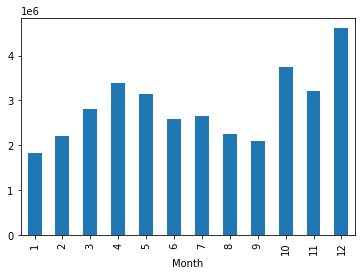

In [36]:
all_files.groupby(["Month"])["Total sale"].sum().sort_index().plot(kind="bar")